# Import packages and dataset

In [1]:
# essentials
import pandas as pd
import numpy as np

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

from collections import Counter

In [ ]:
print(plt.style.available)

In [2]:
df = pd.read_csv('Movies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.duplicated().sum()  # Check for duplicates

np.int64(0)

In [5]:
df.isnull().sum()  # Check missing values

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
df.isnull().sum().sort_values(ascending=False)

Gross            169
Meta_score       157
Certificate      101
Poster_Link        0
Runtime            0
Genre              0
Series_Title       0
Released_Year      0
Overview           0
IMDB_Rating        0
Star1              0
Director           0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
dtype: int64

# Clean and prepare the data

## Convert data types

In [7]:
# For numeric-based analysis:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# To see, for example, the average movie length
df['Runtime'] = df['Runtime'].str.replace('min', '').astype(int)

# I noticed that it is a string with commas (e.g., 1,000,000) which can be used later for scatter plots, bar charts or other plots
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 125.1+ KB


## Handle missing values

In [9]:
# Drop the only row missing release year
df.dropna(subset=['Released_Year'], inplace=True)

# Fill missing Certificate with a neutral category
df['Certificate'].fillna('Not Rated', inplace=True)

# Fill missing Meta_score with the average
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

# Fill missing Gross with 0
df['Gross'].fillna(0, inplace=True)

In [10]:
df.isnull().sum()  # Check missing values

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending=False)

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# Explore the data

## Descriptive Statistics and Value Counts

In [12]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,1991.217217,122.873874,7.949650,77.972684,2.736974e+05,5.641946e+07
std,23.297025,28.102520,0.275407,11.367710,3.275366e+05,1.032231e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,0.000000e+00
25%,1976.000000,103.000000,7.700000,72.000000,5.547150e+04,4.422285e+05
50%,1999.000000,119.000000,7.900000,77.972684,1.383560e+05,1.068028e+07
75%,2009.000000,137.000000,8.100000,85.500000,3.744775e+05,6.139004e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [13]:
# See the frequency of certificates
df['Certificate'].value_counts()

Certificate
U            233
A            197
UA           175
R            146
Not Rated    101
PG-13         43
PG            37
Passed        34
G             12
Approved      11
TV-PG          3
GP             2
TV-14          1
Unrated        1
TV-MA          1
16             1
U/A            1
Name: count, dtype: int64

In [14]:
# See the frequency of genres
df['Genre'].value_counts().head(10)

Genre
Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: count, dtype: int64

In [15]:
# Find the number of movies per year
df['Released_Year'].value_counts().sort_index(ascending=False).head(20)

Released_Year
2020.0     6
2019.0    23
2018.0    19
2017.0    22
2016.0    28
2015.0    25
2014.0    32
2013.0    28
2012.0    24
2011.0    18
2010.0    23
2009.0    29
2008.0    21
2007.0    26
2006.0    26
2005.0    17
2004.0    31
2003.0    22
2002.0    19
2001.0    27
Name: count, dtype: int64

In [ ]:
# plt.figure(figsize=(12, 5))
# df['Released_Year'].value_counts().sort_index().plot(kind='line')
# plt.title("Number of Movies released per Year")
# plt.xlabel("Year")
# plt.ylabel("Number of movies")
# plt.grid(True)
#
# # Save the picture before showing the plot
# plt.savefig("insight_movies_per_year.png", dpi=300, bbox_inches='tight')
#
# plt.show()
# plt.close()

<Figure size 1200x500 with 0 Axes>

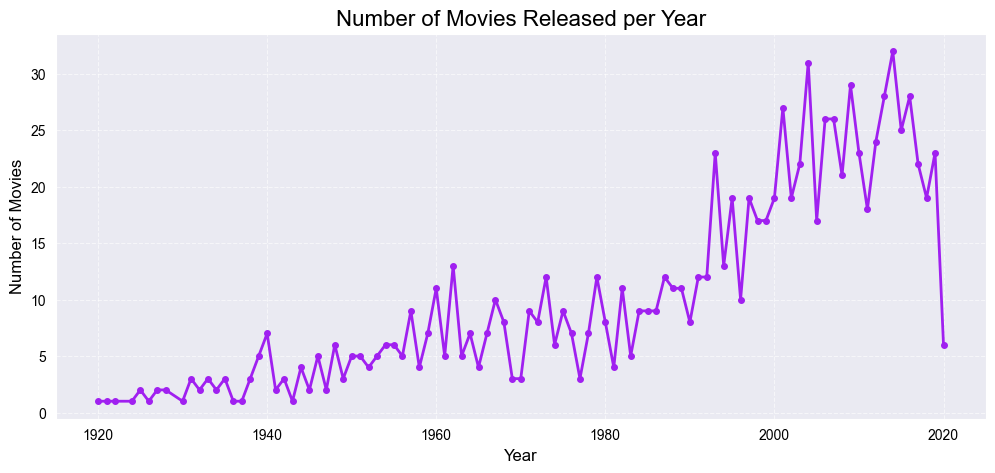

In [16]:
# Personalized version
plt.figure(figsize=(12, 5))
plt.figure(figsize=(12, 5))
df['Released_Year'].value_counts().sort_index().plot(
    kind='line',
    color='#A020F0',      # Purple line
    marker='o',
    markersize=4,
    linewidth=2
)

plt.title("Number of Movies Released per Year", fontsize=16, color='black')
plt.xlabel("Year", fontsize=12, color='black')
plt.ylabel("Number of Movies", fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(True, linestyle='--', alpha=0.6)

# Save directly to the assets folder
plt.savefig("assets/insight1_movies_per_year.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

I can see that movie production has increased over time, peaking around the 2000s, then slightly declining by 2020.

In [17]:
df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False)

Certificate
TV-14        8.300000
16           8.100000
TV-MA        8.100000
Unrated      8.100000
Passed       8.020588
G            8.000000
A            7.998985
U            7.978541
UA           7.957143
Approved     7.945455
Not Rated    7.931683
PG           7.927027
TV-PG        7.900000
R            7.869863
GP           7.850000
PG-13        7.797674
U/A          7.600000
Name: IMDB_Rating, dtype: float64

## Compare average IMDB ratings per certificate

In [18]:
df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False)

Certificate
TV-14        8.300000
16           8.100000
TV-MA        8.100000
Unrated      8.100000
Passed       8.020588
G            8.000000
A            7.998985
U            7.978541
UA           7.957143
Approved     7.945455
Not Rated    7.931683
PG           7.927027
TV-PG        7.900000
R            7.869863
GP           7.850000
PG-13        7.797674
U/A          7.600000
Name: IMDB_Rating, dtype: float64

In [19]:
# Show all certificate ratings
df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False).reset_index()

,Certificate,IMDB_Rating
0,TV-14,8.300000
1,16,8.100000
2,TV-MA,8.100000
3,Unrated,8.100000
4,Passed,8.020588
5,G,8.000000
6,A,7.998985
7,U,7.978541
8,UA,7.957143
9,Approved,7.945455


In [ ]:
# plt.figure(figsize=(10, 6))
# df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
#
# plt.title("Average IMDB Rating by Movie Certificate")
# plt.xlabel("Certificate")
# plt.ylabel("Average IMDB Rating")
# plt.xticks(rotation=45)
# plt.grid(axis='y')
#
# # Save before show
# plt.savefig("insight_imdb_vs_certificate.png", dpi=300, bbox_inches='tight')
# plt.show()
# plt.close()

In [ ]:
# Personalized version
plt.figure(figsize=(10, 6))
df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False).plot(
    kind='bar',
    color='#A020F0',      # Purple bars
    edgecolor='black'
)

plt.title("Average IMDB Rating by Movie Certificate", color='black')
plt.xlabel("Certificate", color='black')
plt.ylabel("Average IMDB Rating", color='black')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.grid(axis='y')

plt.savefig("insight2_imdb_vs_certificate.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Top 10 most frequent actor appearances

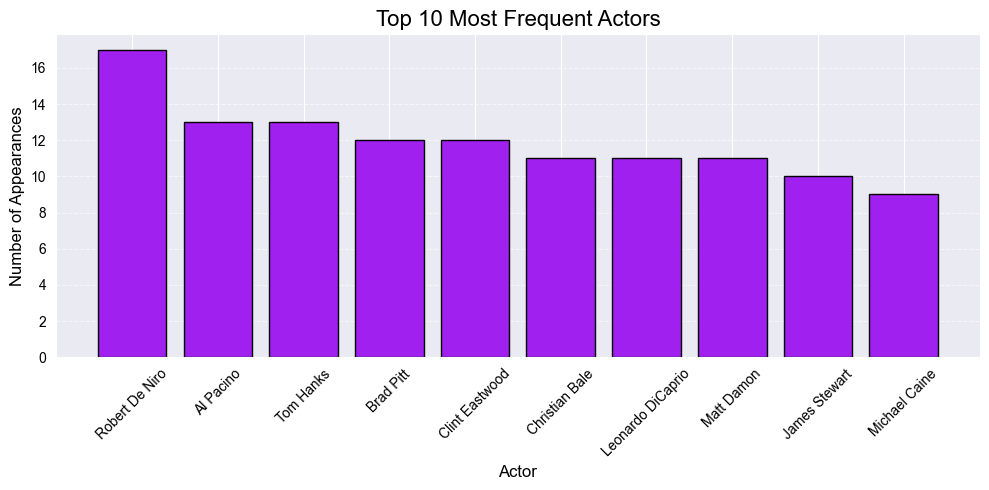

In [20]:
# Combine all 4-star columns into one
# Combine all 4-star columns into one
all_actors = df[['Star1', 'Star2', 'Star3', 'Star4']].values.ravel()
actor_counts = Counter(all_actors)
top_actors = dict(sorted(actor_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
plt.figure(figsize=(10, 5))
plt.bar(top_actors.keys(), top_actors.values(), color='#A020F0', edgecolor='black')

plt.title("Top 10 Most Frequent Actors", fontsize=16, color='black')
plt.xlabel("Actor", fontsize=12, color='black')
plt.ylabel("Number of Appearances", fontsize=12, color='black')
plt.xticks(rotation=45, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("assets/insight3_top_actors.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Top 10 most common genres

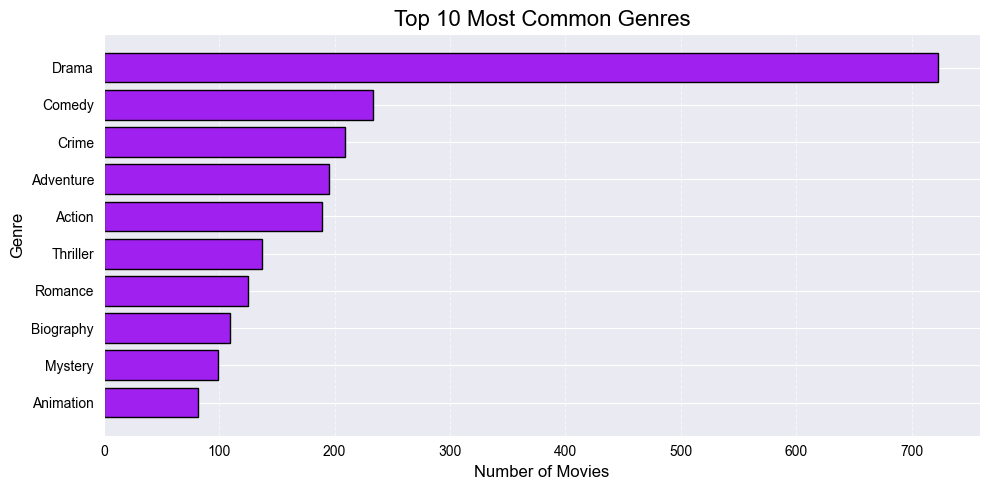

In [21]:
# Count individual genres
genre_split = df['Genre'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_split for genre in sublist]
genre_counts = Counter(flat_genres)
top_genres = dict(genre_counts.most_common(10))

# Plot horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(list(top_genres.keys()), list(top_genres.values()), color='#A020F0', edgecolor='black')

plt.title("Top 10 Most Common Genres", fontsize=16, color='black')
plt.xlabel("Number of Movies", fontsize=12, color='black')
plt.ylabel("Genre", fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("assets/insight4_top_genres.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Rating . Gross

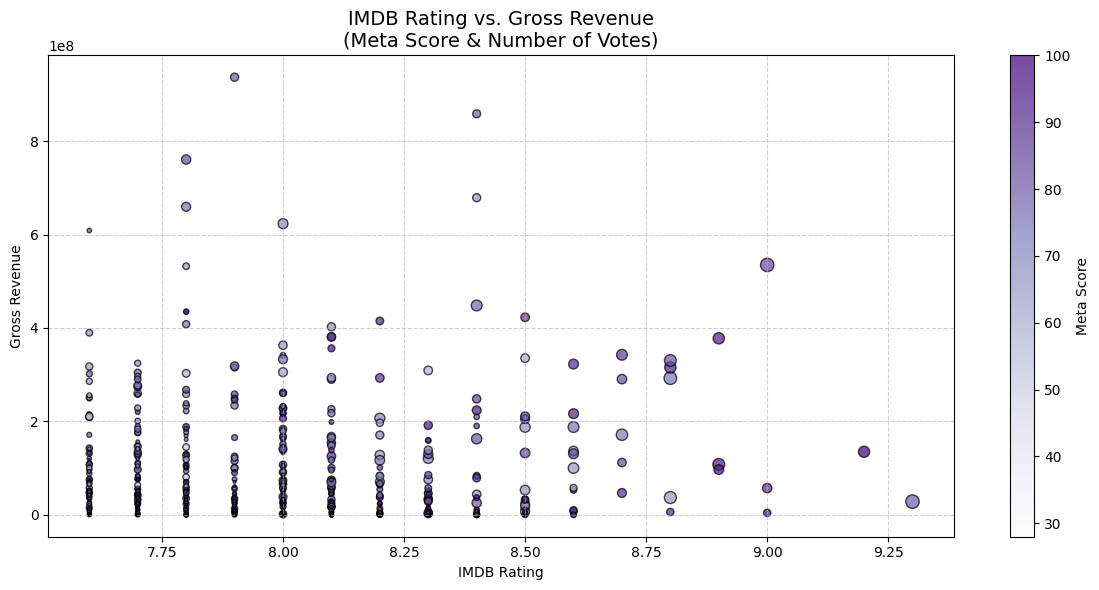

In [23]:
import matplotlib.pyplot as plt

plt.style.use('default')  # Clean white background

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df['IMDB_Rating'],
    df['Gross'],
    c=df['Meta_score'],
    s=df['No_of_Votes'] / 25000,  # Adjust dot size
    cmap='Purples',
    edgecolor='black',
    alpha=0.7
)

plt.colorbar(label='Meta Score')
plt.xlabel("IMDB Rating", color='black')
plt.ylabel("Gross Revenue", color='black')
plt.title("IMDB Rating vs. Gross Revenue\n(Meta Score & Number of Votes)", fontsize=14, color='black')

plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("assets/insight5_rating_vs_gross.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()